# Kaggle courses

# Lesson: Data Visualization: From Non-Coder to Coder!


First of all upload the dataset "security-log.csv"



In [0]:
# Set up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [0]:
# Path of the file to read
sec_filepath = "/content/20190711_security-log.csv"
# header=none: insert the index at the top of the matrix
df = pd.read_csv(sec_filepath, sep=';', header=None)

In [0]:
def cut_string(x, char, pos=0):
    if type(x) == str:
        return x.split(char)[pos]
    else:
        return x

# lambda: funtion in line
#df.columns = [df[col].apply(lambda x: cut_string(x, char='=', pos=0)).dropna().unique()[0] for col in df.columns]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wan1,srcip=192.168.52.2,srcport=60599,url=/
1,itime=1562794099,date=2019-07-10,time=23:28:18,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL,appcat=Network.Service,appid=15895,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL,""",policyid=3,proto=6,service=HTTPS,sessionid=165147,srcintf=wifi,srcip=192.168.52.2,srcport=60599,url=/
2,itime=1562793794,date=2019-07-10,time=23:23:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=NTP,appcat=Network.Service,appid=16270,applist=default,apprisk=elevated,NaN,NaN,dstintf=wan1,dstip=17.253.54.125,NaN,dstport=123,eventtype=app-ctrl-all,NaN,level=information,logid=28704,logver=52,"msg=""Network.Service: NTP,""",policyid=3,proto=17,service=NTP,sessionid=164878,srcintf=wifi,srcip=192.168.52.2,srcport=55484,NaN
3,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=iCloud,appcat=Storage.Backup,appid=29880,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Storage.Backup: iCloud,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/
4,itime=1562793673,date=2019-07-10,time=23:21:15,devid=FWF40C3915001580,vd=root,type=utm,subtype=app-ctrl,action=pass,app=SSL_TLSv1.2,appcat=Network.Service,appid=41540,applist=default,apprisk=medium,NaN,NaN,dstintf=wifi,dstip=17.248.146.168,NaN,dstport=443,eventtype=app-ctrl-all,hostname=gateway.icloud.com,level=information,logid=28704,logver=52,"msg=""Network.Service: SSL_TLSv1.2,""",policyid=3,proto=6,service=HTTPS,sessionid=164786,srcintf=wan1,srcip=192.168.52.2,srcport=60598,url=/


In [0]:
columns=[]
#columns=list()
for col in df.columns:
  print(col)
#  print(df.index)
#  print(df.loc[:10].index)
  series=df[col].copy()
#  series=df.loc[:10,col].copy()
#  print(series)
  for row in df.index:
#  for row in df.loc[:10].index:
#    print(row)
    series[row]=cut_string(df.loc[row,col],'=',0)
  series.dropna(inplace=True)
  list_cols=series.unique()
  print(list_cols)
  if len(list_cols) > 0:
    columns.append(list_cols[0])
  else:
    columns.append(f'hidden_{col}')
print(columns)
df.colums=columns

0
['itime']
1
['date']
2
['time']
3
['devid']
4
['vd']
5
['type']
6
['subtype']
7
['action']
8
['app']
9
['appcat']
10
['appid']
11
['applist']
12
['apprisk']
13
['crlevel']
14
['crscore']
15
['dstintf']
16
['dstip']
17
['dstname']
18
['dstport']
19
['eventtype']
20
['hostname']
21
['level']
22
['logid']
23
['logver']
24
['msg']
25
['policyid']
26
['proto']
27
['service']
28
['sessionid']
29
['srcintf']
30
['srcip']
31
['srcport']
32
['url']
['itime', 'date', 'time', 'devid', 'vd', 'type', 'subtype', 'action', 'app', 'appcat', 'appid', 'applist', 'apprisk', 'crlevel', 'crscore', 'dstintf', 'dstip', 'dstname', 'dstport', 'eventtype', 'hostname', 'level', 'logid', 'logver', 'msg', 'policyid', 'proto', 'service', 'sessionid', 'srcintf', 'srcip', 'srcport', 'url']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [0]:
df.columns=columns
df = df.applymap(lambda x: cut_string(x, char='=', pos=1))

#exercise: detail the last instruction

In [0]:
df.tail()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
7361,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,23.33.6.135,NaN,443,app-ctrl-all,iphone-ld.apple.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,148,wifi,192.168.52.2,57877,/
7362,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,104.83.154.143,NaN,443,app-ctrl-all,cl4.apple.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,147,wifi,192.168.52.2,57876,/
7363,1562570745,2019-07-06,12:08:54,FWF40C3915001580,root,utm,app-ctrl,pass,YouTube,Video/Audio,31077,default,elevated,NaN,NaN,wan1,216.58.205.174,NaN,443,app-ctrl-all,s.youtube.com,information,28704,52,"""Video/Audio: YouTube,""",3,6,HTTPS,146,wifi,192.168.52.2,57875,/
7364,1562570745,2019-07-06,12:08:40,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,1.1.1.7,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,88,wifi,192.168.52.2,56642,NaN
7365,1562570745,2019-07-06,12:08:40,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,1.1.1.7,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,63,wifi,192.168.52.2,59278,NaN


# Data elaboration


0. data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname 
1. select the most interesting colums
2. for each column indentify if there is an interesting graph to plot 
3. group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)
4. identifying relationships among the original columns or the columns classificated
5. identifying not accessible url parsing the output of the http call
6. identifying the meaning of the accessible urls
7. thinking to a first neural network application
8. other ideas





data cleaning; for example: the first cleaning should be on the unreachable or incorrect hostname

for each column indentify if there is an interesting graph to plot

group the values of each of these columns to obtain a classification to plot (for example the most common source IP, especially from the pubblic net)

identifying relationships among the original columns or the columns classificated

identifying not accessible url parsing the output of the http call

identifying the meaning of the accessible urls

thinking to a first neural network application

other ideas

In [0]:
df.head()

,itime,date,time,devid,vd,type,subtype,action,app,appcat,appid,applist,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,eventtype,hostname,level,logid,logver,msg,policyid,proto,service,sessionid,srcintf,srcip,srcport,url
0,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,165147,wan1,192.168.52.2,60599,/
1,1562794099,2019-07-10,23:28:18,FWF40C3915001580,root,utm,app-ctrl,pass,SSL,Network.Service,15895,default,elevated,NaN,NaN,wan1,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL,""",3,6,HTTPS,165147,wifi,192.168.52.2,60599,/
2,1562793794,2019-07-10,23:23:15,FWF40C3915001580,root,utm,app-ctrl,pass,NTP,Network.Service,16270,default,elevated,NaN,NaN,wan1,17.253.54.125,NaN,123,app-ctrl-all,NaN,information,28704,52,"""Network.Service: NTP,""",3,17,NTP,164878,wifi,192.168.52.2,55484,NaN
3,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,iCloud,Storage.Backup,29880,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Storage.Backup: iCloud,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/
4,1562793673,2019-07-10,23:21:15,FWF40C3915001580,root,utm,app-ctrl,pass,SSL_TLSv1.2,Network.Service,41540,default,medium,NaN,NaN,wifi,17.248.146.168,NaN,443,app-ctrl-all,gateway.icloud.com,information,28704,52,"""Network.Service: SSL_TLSv1.2,""",3,6,HTTPS,164786,wan1,192.168.52.2,60598,/


Select the most interesting colums

In [0]:
df.columns.tolist()

['itime',
 'date',
 'time',
 'devid',
 'vd',
 'type',
 'subtype',
 'action',
 'app',
 'appcat',
 'appid',
 'applist',
 'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'eventtype',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'policyid',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

In [0]:
interesting_columns=[
 'date',
 'time',
 'app',
 'appcat',
  'apprisk',
 'crlevel',
 'crscore',
 'dstintf',
 'dstip',
 'dstname',
 'dstport',
 'hostname',
 'level',
 'logid',
 'logver',
 'msg',
 'proto',
 'service',
 'sessionid',
 'srcintf',
 'srcip',
 'srcport',
 'url']

Create a new dataset keeping the interesting_columns only

In [0]:
df1 = df[interesting_columns]

Generic infographic of the new dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 33 columns):
itime        7366 non-null object
date         7366 non-null object
time         7366 non-null object
devid        7366 non-null object
vd           7366 non-null object
type         7366 non-null object
subtype      7366 non-null object
action       7366 non-null object
app          7366 non-null object
appcat       7366 non-null object
appid        7366 non-null object
applist      7366 non-null object
apprisk      7313 non-null object
crlevel      10 non-null object
crscore      10 non-null object
dstintf      7366 non-null object
dstip        7366 non-null object
dstname      467 non-null object
dstport      7366 non-null object
eventtype    7366 non-null object
hostname     6474 non-null object
level        7366 non-null object
logid        7366 non-null object
logver       7366 non-null object
msg          7366 non-null object
policyid     7366 non-null object
proto        7

In [0]:
print(len(df1))
df1.info()

7366
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7366 entries, 0 to 7365
Data columns (total 23 columns):
date         7366 non-null object
time         7366 non-null object
app          7366 non-null object
appcat       7366 non-null object
apprisk      7313 non-null object
crlevel      10 non-null object
crscore      10 non-null object
dstintf      7366 non-null object
dstip        7366 non-null object
dstname      467 non-null object
dstport      7366 non-null object
hostname     6474 non-null object
level        7366 non-null object
logid        7366 non-null object
logver       7366 non-null object
msg          7366 non-null object
proto        7366 non-null object
service      7366 non-null object
sessionid    7366 non-null object
srcintf      7366 non-null object
srcip        7366 non-null object
srcport      7366 non-null object
url          6474 non-null object
dtypes: object(23)
memory usage: 1.3+ MB


In [0]:
df1.describe()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
count,7366,7366,7366,7366,7313,10,10,7366,7366,467,7366,6474,7366,7366,7366,7366,7366,7366,7366,7366,7366,7366,6474
unique,4,2243,42,12,3,1,1,4,716,60,13,419,1,1,1,42,3,13,4310,4,6,3984,76
top,2019-07-09,07:10:31,SSL,Network.Service,elevated,low,5,wan1,79.7.90.141,a104-83-88-10.deploy.static.akamaitechnologies...,443,zenetto.readynet.it,information,28704,52,"""Network.Service: SSL,""",6,HTTPS,141488,wifi,192.168.52.2,50499,/
freq,3035,49,2455,5519,4398,10,10,4414,562,38,5964,562,7366,7366,7366,2455,6735,5964,34,3012,3563,34,6322


In [0]:
#?sns.heatmap()
df1.isnull()

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
0,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


Missing values using heatmap

Text(0.5, 42.0, 'Log Lines')

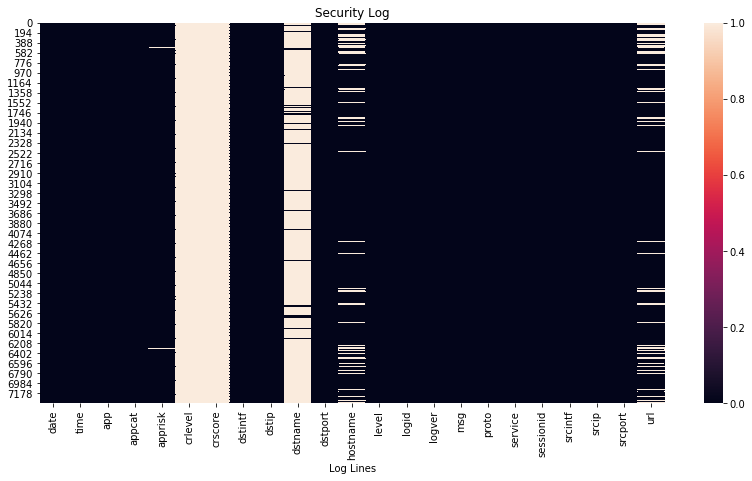

In [0]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Security Log")

# Heatmap showing 
sns.heatmap(data=df1.isnull(), annot=False)

# Add label for horizontal axis
plt.xlabel("Log Lines")

In [0]:
df2_suspect = df1.dropna(subset=["crlevel","crscore"], axis=0)
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN
4452,2019-07-09,20:11:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124678,wifi-vodafone,192.168.53.2,53123,NaN
4465,2019-07-09,20:09:15,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124605,wifi-vodafone,192.168.53.2,53119,NaN
4470,2019-07-09,20:08:47,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124542,wifi-vodafone,192.168.53.2,53114,NaN
4516,2019-07-09,19:28:27,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,123821,wifi-vodafone,192.168.53.2,53106,NaN
4601,2019-07-09,18:06:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,122189,wifi-vodafone,192.168.53.2,53075,NaN
5299,2019-07-09,08:04:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,112135,wifi-vodafone,192.168.53.3,55724,NaN
5398,2019-07-09,07:52:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,111626,wifi-vodafone,192.168.53.2,52547,NaN


In [0]:
df2_suspect.sort_values(by=["date","time"], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2_suspect

,date,time,app,appcat,apprisk,crlevel,crscore,dstintf,dstip,dstname,dstport,hostname,level,logid,logver,msg,proto,service,sessionid,srcintf,srcip,srcport,url
5398,2019-07-09,07:52:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,111626,wifi-vodafone,192.168.53.2,52547,NaN
5299,2019-07-09,08:04:10,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,whatsapp-chatd-edge-shv-01-mxp1.facebook.com,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,112135,wifi-vodafone,192.168.53.3,55724,NaN
4601,2019-07-09,18:06:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,122189,wifi-vodafone,192.168.53.2,53075,NaN
4516,2019-07-09,19:28:27,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,123821,wifi-vodafone,192.168.53.2,53106,NaN
4470,2019-07-09,20:08:47,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124542,wifi-vodafone,192.168.53.2,53114,NaN
4465,2019-07-09,20:09:15,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124605,wifi-vodafone,192.168.53.2,53119,NaN
4452,2019-07-09,20:11:36,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,124678,wifi-vodafone,192.168.53.2,53123,NaN
4245,2019-07-09,21:32:53,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,126635,wifi-vodafone,192.168.53.2,53539,NaN
4140,2019-07-09,22:51:11,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,128249,wifi-vodafone,192.168.53.2,53597,NaN
1913,2019-07-10,13:36:18,BitTorrent,P2P,NaN,low,5,wan1,31.13.86.49,NaN,5222,NaN,information,28704,52,"""P2P: BitTorrent""",6,tcp/5222,145898,wifi-vodafone,192.168.53.2,54117,NaN


Imputation of missing values (for example:  'crlevel', 'crscore')

In [0]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].dropna().unique(),len(df1[col].dropna().unique()))

crlevel ['low'] 1
crscore ['5'] 1
dstname ['mil04s27-in-f3.1e100.net' 'mil04s29-in-f195.1e100.net'
 'mil04s26-in-f99.1e100.net' 'mil04s26-in-f110.1e100.net'
 'mil04s04-in-f14.1e100.net' 'mil04s25-in-f3.1e100.net'
 'mil04s28-in-f162.1e100.net' 'mil04s29-in-f4.1e100.net' '93.184.220.29'
 'mil04s04-in-f35.1e100.net' 'mil04s27-in-f14.1e100.net'
 'mil04s27-in-f10.1e100.net' 'mil04s29-in-f206.1e100.net'
 'mil04s27-in-f4.1e100.net' 'mil04s26-in-f10.1e100.net'
 'mil04s26-in-f104.1e100.net' '13.107.4.50' 'mil04s03-in-f3.1e100.net'
 'mil04s28-in-f4.1e100.net' 'mil04s03-in-f14.1e100.net'
 'mil04s28-in-f14.1e100.net'
 'a104-83-88-10.deploy.static.akamaitechnologies.com'
 'ocsp.sc.intesasanpaolo.infocert.it' 'ws19414012241.fujitsu.es'
 '37.157.4.24' 'mil04s25-in-f78.1e100.net'
 'a95-101-180-177.deploy.static.akamaitechnologies.com'
 'defra3-vip-bx-008.aaplimg.com'
 'a88-221-111-48.deploy.static.akamaitechnologies.com' '83.224.68.148'
 'a95-101-180-176.deploy.static.akamaitechnologies.com' '83.224.6

In [0]:
for col in ["crlevel","crscore","dstname"]:
  print(col,df1[col].value_counts())

crlevel low    10
Name: crlevel, dtype: int64
crscore 5    10
Name: crscore, dtype: int64
dstname a104-83-88-10.deploy.static.akamaitechnologies.com      38
mil04s26-in-f110.1e100.net                              33
mil04s03-in-f14.1e100.net                               24
mil04s04-in-f14.1e100.net                               21
mil04s27-in-f14.1e100.net                               20
mil04s27-in-f142.1e100.net                              20
mil04s29-in-f195.1e100.net                              19
mil04s28-in-f14.1e100.net                               18
mil04s25-in-f78.1e100.net                               15
83.224.68.147                                           14
a95-101-180-177.deploy.static.akamaitechnologies.com    14
mil04s26-in-f99.1e100.net                               12
mil04s04-in-f46.1e100.net                               11
defra3-vip-bx-001.aaplimg.com                           11
mil04s04-in-f35.1e100.net                               10
mil04s29-in-f206.

Extract occurrences for the following columns:
- destip
- sessionid
- app
- srcip
- service
- hostname

In [0]:
for col in ["dstip","sessionid","app","srcip","service","hostname"]:
  print(col,df1[col].value_counts())

dstip 79.7.90.141        562
192.168.1.203      357
17.253.54.125      233
156.54.131.85      183
104.83.88.10       160
99.86.163.101      159
99.86.163.110      132
17.242.57.246      111
40.67.252.61       102
52.0.252.24        101
31.13.86.8          81
31.13.86.36         57
213.227.153.240     56
157.240.193.63      55
157.240.193.16      52
37.10.0.96          50
99.86.163.121       49
104.244.39.20       48
2.20.158.32         48
31.13.86.2          48
52.0.253.129        46
216.58.205.106      46
17.250.13.5         44
104.83.154.143      42
216.58.205.138      42
216.58.205.110      40
216.58.205.142      40
69.173.144.140      40
216.58.205.194      39
17.142.171.15       38
                  ... 
208.91.112.52        1
92.122.145.12        1
2.20.86.37           1
52.21.30.251         1
173.194.151.186      1
104.83.89.175        1
67.27.225.254        1
2.20.157.101         1
173.194.162.72       1
104.244.42.136       1
52.109.76.40         1
143.204.15.100       1
74.12

In [0]:
df1.index


RangeIndex(start=0, stop=7366, step=1)

Plot the different occurences

In [0]:
df1.columns

Index(['date', 'time', 'app', 'appcat', 'apprisk', 'crlevel', 'crscore',
       'dstintf', 'dstip', 'dstname', 'dstport', 'hostname', 'level', 'logid',
       'logver', 'msg', 'proto', 'service', 'sessionid', 'srcintf', 'srcip',
       'srcport', 'url'],
      dtype='object')

In [0]:

df1.values

array([['2019-07-10', '23:28:18', 'SSL_TLSv1.2', ..., '192.168.52.2',
        '60599', '/'],
       ['2019-07-10', '23:28:18', 'SSL', ..., '192.168.52.2', '60599',
        '/'],
       ['2019-07-10', '23:23:15', 'NTP', ..., '192.168.52.2', '55484',
        nan],
       ...,
       ['2019-07-06', '12:08:54', 'YouTube', ..., '192.168.52.2',
        '57875', '/'],
       ['2019-07-06', '12:08:40', 'NTP', ..., '192.168.52.2', '56642',
        nan],
       ['2019-07-06', '12:08:40', 'NTP', ..., '192.168.52.2', '59278',
        nan]], dtype=object)

In [0]:
df1[["dstip"]]

,dstip
0,17.248.146.168
1,17.248.146.168
2,17.253.54.125
3,17.248.146.168
4,17.248.146.168
5,17.248.146.168
6,79.7.90.137
7,79.7.90.137
8,192.168.1.203
9,79.7.90.137


In [0]:
 df1.iloc[3]

date                        2019-07-10
time                          23:21:15
app                             iCloud
appcat                  Storage.Backup
apprisk                         medium
crlevel                            NaN
crscore                            NaN
dstintf                           wifi
dstip                   17.248.146.168
dstname                            NaN
dstport                            443
hostname            gateway.icloud.com
level                      information
logid                            28704
logver                              52
msg          "Storage.Backup: iCloud,"
proto                                6
service                          HTTPS
sessionid                       164786
srcintf                           wan1
srcip                     192.168.52.2
srcport                          60598
url                                  /
Name: 3, dtype: object

In [0]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
#df3={'dstip' : df1["dstip"], 'dstip_count' : df1["dstip"].value_counts()}
df3={'dstip_count' : df1["dstip"].value_counts()}
df4 = pd.DataFrame(df3)[:10]
#df4 = pd.DataFrame(df3)
df4


,dstip_count
79.7.90.141,562
192.168.1.203,357
17.253.54.125,233
156.54.131.85,183
104.83.88.10,160
99.86.163.101,159
99.86.163.110,132
17.242.57.246,111
40.67.252.61,102
52.0.252.24,101


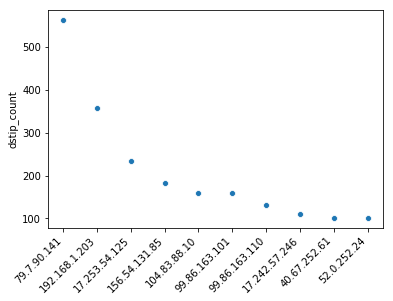

In [0]:
x4=df4.index
y4=df4["dstip_count"]
#plt.figure(figsize=(10,5))
chart = sns.scatterplot(x4, y4)
#chart = sns.countplot(
#    data=data[data['Year'] == 1980],
#    x='Sport',
#    palette='Set1'
#)
#chart
#chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
#chart.set_xticklabels('ddd',rotation=45,horizontalalignment='right')
#chart.get_xticklabels()
plt.xticks(rotation=45,horizontalalignment='right');

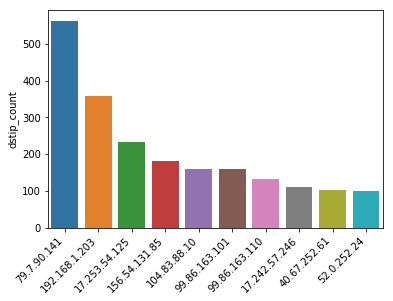

In [0]:
chart = sns.barplot(x4, y4)
plt.xticks(rotation=45,horizontalalignment='right');

In [0]:
# transform the dataframe in an matrix of 2 columns: dstip and the count of the dstip
df5={'app_count' : df1["app"].value_counts()}
df6 = pd.DataFrame(df5)[:10]
df6


,app_count
SSL,2455
SSL_TLSv1.2,2371
Viber,603
SNMP_GetRequest,271
NTP,235
YouTube,220
Facebook,190
iCloud,136
Apple.iOS.Push.Notification,131
Instagram,83


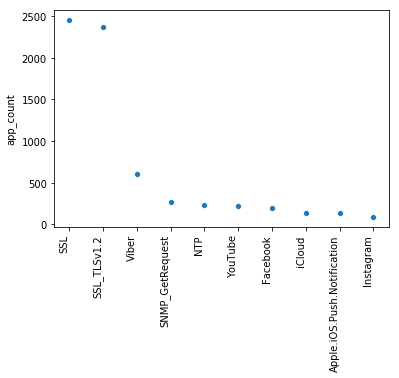

In [0]:
sns.scatterplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=90,horizontalalignment='right');

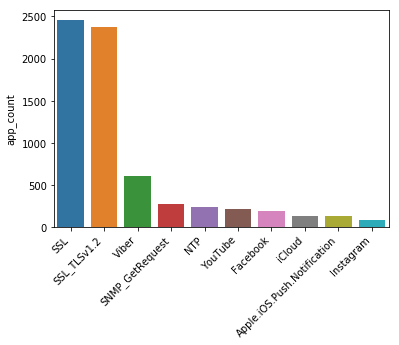

In [0]:
chart = sns.barplot(x=df6.index, y=df6["app_count"])
plt.xticks(rotation=45,horizontalalignment='right');

Extract occurrences for the following columns:

time slot (4; 0-6, 7-12, 13-18, 19-24) on "time" columns

for each time sloc compute la frequency of the single service

  x: time slot
  
  y: frequency
  
  color (label): service

In [0]:
#df['time'] = pd.to_timedelta(df['time'],unit='s')
df['time'] = pd.to_datetime(df['time'])
df['hours'] = df['time'].dt.hour
#data=df.groupby([pd.Grouper(key='time',freq='H'),'app'])['app'].agg({'freq':'count'}).reset_index()
data=df.groupby(['hours','app'])['app'].agg({'freq':'count'}).reset_index()
#data=data.pivot(index='time',columns='app',values='freq').fillna(0)
data=data.pivot(index='hours',columns='app',values='freq').fillna(0)
data.head()
#df['hours'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


app,Apple.Ipad,Apple.Iphone,Apple.Software.Update,Apple.Store,Apple.iOS.Push.Notification,BitTorrent,Facebook,Facebook_Video.Play,Google.Accounts,Google.Ads,Google.Analytics,Google.Calendar,Google.Drive,Google.Services,HTTP.Audio,HTTP.Download.Accelerator,HTTP.Segmented.Download,IMAPS,Instagram,MS.Windows.Update,Microsoft.Authentication,Microsoft.Office.Online,Microsoft.Portal,NTP,OCSP,Ping,SNMP_GetNextRequest,SNMP_GetRequest,SNMP_V1,SSL,SSL_SSLv3,SSL_TLSv1.0,SSL_TLSv1.1,SSL_TLSv1.2,Skype,Spotify,Twitter,Viber,Vkontakte,WhatsApp,YouTube,iCloud
hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1,0.0,2.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
3,0.0,5.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [0]:
highest_freq_app=data.sum().sort_values(ascending=False).apply(lambda x: x if x>200 else np.nan).dropna().index

Text(0.5, 0, 'Hours')

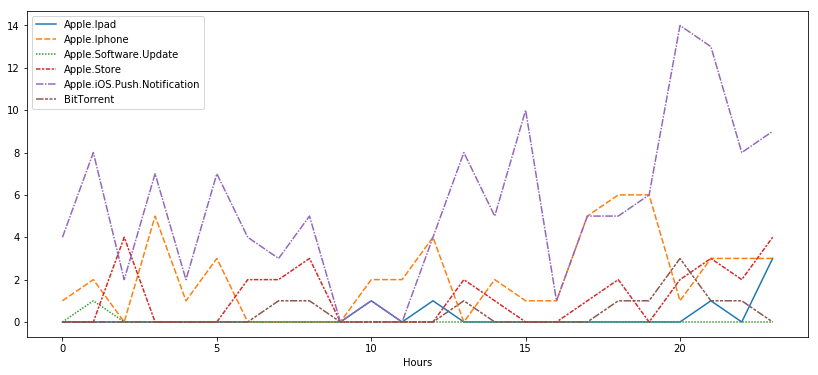

In [0]:
plt.figure(figsize=(14,6))
#sns.lineplot(data=data.loc[:,highest_freq_app])
sns.lineplot(data=data.iloc[:,:6])
plt.xlabel("Hours")
#plt.xticks(pd.to_datetime(data.index))